In [3]:
# Importamos las librerías que se utilizarán:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Ruta al archivo 
file_path = r'C:\temp\datos_2021\EMCR_2021.tab'

# Intentar cargar el archivo
try:
    df_emcr2021 = pd.read_csv(file_path, sep='\t', encoding='utf-8')
    print("Archivo cargado con éxito. A continuación, las primeras 5 filas del dataset")
    print(df_emcr2021.head())
except PermissionError:
    print("Error: No hay permiso para acceder al archivo. Revisar los permisos.")
except FileNotFoundError:
    print("Error: Archivo no encontrado. Verificar la ruta.")

Archivo cargado con éxito. A continuación, las primeras 5 filas del dataset
   SECU_PER  ORDEN  ANYO TRIM TIPO_MIGR  SEXO  PAIS_NACIM  PROVNAC  MUNINAC  \
0         1      1  2021   T3        MI     1         108     20.0      NaN   
1         2      1  2021   T3        MI     6         108     31.0    232.0   
2         3      1  2021   T2        MI     6         108      1.0      NaN   
3         4      1  2021   T4        MI     6         108     24.0      NaN   
4         5      1  2021   T1        EE     6         108     20.0     30.0   

   TAMUNAC  EDAD  ANAC  PAIS_NACIO  PAIS_PROC_DEST  PROVDEST  MUNIDEST  \
0      1.0    61  1960         108             NaN      31.0       NaN   
1      3.0    57  1963         108             NaN      31.0       NaN   
2      1.0    61  1959         108             NaN       1.0       NaN   
3      1.0    66  1955         108             NaN       1.0      59.0   
4      3.0    55  1965         108             0.0       NaN       NaN   

   T

In [8]:
print("Últimas 10 filas del dataset:")

print(df_emcr2021.tail(10))

Últimas 10 filas del dataset:
         SECU_PER  ORDEN  ANYO TRIM TIPO_MIGR  SEXO  PAIS_NACIM  PROVNAC  \
3255533   3110589      1  2021   T4        IE     1         426      NaN   
3255534   3110590      1  2021   T3        IE     1         426      NaN   
3255535   3110591      1  2021   T3        IE     6         351      NaN   
3255536   3110592      1  2021   T3        IE     1         407      NaN   
3255537   3110593      1  2021   T4        IE     6         410      NaN   
3255538   3110594      1  2021   T3        IE     1         340      NaN   
3255539   3110594      2  2021   T4        MI     1         340      NaN   
3255540   3110595      1  2021   T4        IE     1         351      NaN   
3255541   3110596      1  2021   T1        IE     6         410      NaN   
3255542   3110597      1  2021   T2        IE     1         426      NaN   

         MUNINAC  TAMUNAC  EDAD  ANAC  PAIS_NACIO  PAIS_PROC_DEST  PROVDEST  \
3255533      NaN      NaN     1  2019         426     

In [9]:
# Información general del dataset (número de filas, columnas, tipos de datos)
print("\nInformación general del dataset:")
print(df_emcr2021.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255543 entries, 0 to 3255542
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SECU_PER        int64  
 1   ORDEN           int64  
 2   ANYO            int64  
 3   TRIM            object 
 4   TIPO_MIGR       object 
 5   SEXO            int64  
 6   PAIS_NACIM      int64  
 7   PROVNAC         float64
 8   MUNINAC         float64
 9   TAMUNAC         float64
 10  EDAD            int64  
 11  ANAC            int64  
 12  PAIS_NACIO      int64  
 13  PAIS_PROC_DEST  float64
 14  PROVDEST        float64
 15  MUNIDEST        float64
 16  TAMUDEST        float64
 17  PROVPROC        float64
 18  MUNIPROC        float64
 19  TAMUPROC        float64
dtypes: float64(10), int64(8), object(2)
memory usage: 496.8+ MB
None


In [10]:
# Seleccionando las columnas columnas númericas relevantes para el análisis, en este caso sería únicamente la edad.
columnas_relevantes = ['EDAD'] 

# Calcular estadísticas descriptivas
estadisticas = df_emcr2021[columnas_relevantes].describe()

# Convertir las estadísticas a enteros para mayor legibilidad
estadisticas_formateadas = estadisticas.applymap(lambda x: int(x) if x == x // 1 else round(x))

# Imprimir resultados
print("Estadísticas descriptivas de las variables numéricas relevantes (formato entero):")
print(estadisticas_formateadas)


Estadísticas descriptivas de las variables numéricas relevantes (formato entero):
          EDAD
count  3255543
mean        36
std         19
min          0
25%         24
50%         34
75%         47
max         90


C:\Users\josep\AppData\Local\Temp\ipykernel_13664\4113033831.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  estadisticas_formateadas = estadisticas.applymap(lambda x: int(x) if x == x // 1 else round(x))


In [11]:
# Número de filas y columnas del dataset:
df_emcr2021.shape

(3255543, 20)

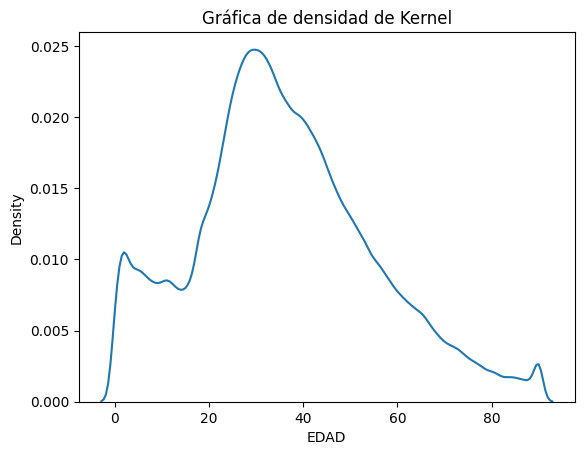

In [12]:
# Gráfica de densidad:
sns.kdeplot(data=df_emcr2021, x='EDAD')
plt.title("Gráfica de densidad de Kernel")
plt.show()

En la gráfica anterior se observa como la población del dataset está principalmente concentrada en edades productivas, de entre 30 a 50 años. Por otro lado, hay una baja representación de extremos jóvenes (0 a 20) y menos aún la representación de mayores de 60 años. 

In [16]:
# Filas duplicadas:
print("Cantidad de filas duplicadas:")
df_emcr2021[df_emcr2021.duplicated()].shape[0]

Cantidad de filas duplicadas:


0

No hay filas duplicadas.

In [15]:
#valores únicos:

print("Cantidad de valores únicos por cada columna:")

df_emcr2021.nunique()

Cantidad de valores únicos por cada columna:


SECU_PER          3110597
ORDEN                   9
ANYO                    1
TRIM                    4
TIPO_MIGR               3
SEXO                    2
PAIS_NACIM             60
PROVNAC                53
MUNINAC               231
TAMUNAC                 6
EDAD                   91
ANAC                   92
PAIS_NACIO             61
PAIS_PROC_DEST         60
PROVDEST               52
MUNIDEST              230
TAMUDEST                6
PROVPROC               52
MUNIPROC              230
TAMUPROC                6
dtype: int64

SECU_PER: Tiene 3110597 valores únicos. SECU_PER significa Secuencial por Persona y es el ID de la persona que realiza el movimiento migratorio. Sabemos que en total tenemos 3255543 filas, lo que significa que hay individuos que han realizado más de 1 movimiento migratorio durante el mismo año, 2021. 

ORDEN: Se entiende que hay individuos que han realizado más de 1 movimiento migratorio durante el 2021, inclusive llegando a 9 movimientos migratorios. 

TIPO_MIGR: existen 3 tipos diferentes de movimientos migratorios: IE, EE, MI.


In [17]:
# Valores nulos:

print("Valores nulos por columna:")
print(df_emcr2021.isnull().sum())

Valores nulos por columna:
SECU_PER                0
ORDEN                   0
ANYO                    0
TRIM                    0
TIPO_MIGR               0
SEXO                    0
PAIS_NACIM              0
PROVNAC           1899504
MUNINAC           2141250
TAMUNAC           1899900
EDAD                    0
ANAC                    0
PAIS_NACIO              0
PAIS_PROC_DEST    1670717
PROVDEST           696866
MUNIDEST          1251990
TAMUDEST           696866
PROVPROC           887960
MUNIPROC          1351070
TAMUPROC           887960
dtype: int64


Los valores nulos evidenciados en el resumen no representan un problema, ya que se debe a una característica lógica del diseño del dataset. Es decir, hay presencia de variables que son mutuamente excluyentes, por lo que si un determinado registro presenta valor en una variable la otra variable será nula para el mismo registro. Por ejemplo, si una persona realiza un movimiento migratorio de ingreso a España, solo los campos PROVDEST, MUNIDEST, TAMUDEST tendrían valores válidos, mientras que los campos PROVPROC, MUNIPROC y TAMUPROC tendrían valores nulos, pues el campo no contempla valores de procedencia que sean fuera de España. Por otro lado, vemos que no hay ningún valor nulo para las variables que son de nuestro interés tales como EDAD, PAIS_NACIM (país de nacimiento), SEXO y TIPO_MIGR (Tipo de Migración) o SECU_PER (id)

El análisis de datos se ha continuado en gran medida con el Power BI y Flourish y se puede acceder a el en este mismo repositorio.